In [1]:
# Get conc/abs freqs

In [3]:
import sys; sys.path.append('../..')
from abslithist import *
from abslithist.words import *
from abslithist.realism import *

In [4]:
C=lltk.load('CanonFiction')

In [5]:
fields = get_allfields()

In [6]:
absconcd = {
    'abs':fields['Abs-Conc.Median.Abs.median'],
    'conc':fields['Abs-Conc.Median.Conc.median'],
    'neither':fields['Abs-Conc.Median.Neither.median'],
}

In [12]:
dfd = dict(
    (key,pd.DataFrame())
    for key in absconcd
)

In [13]:
def parse_text(t):
    if not t.exists: return
    countd=Counter(tokenize(t.txt))
    for key in absconcd:
        ld = [
            {'id':t.id, 'word':w, 'count':countd[w]}
            for w in absconcd[key]
            if w in countd
        ]
        dfd[key]=dfd[key].append(pd.DataFrame(ld))

In [14]:
for t in tqdm(C.texts()):
    parse_text(t)

100%|██████████| 1809/1809 [20:19<00:00,  1.48it/s]


In [17]:
sumdf=dfd['conc'].groupby('word').sum()

In [20]:
sumdf.sort_values('count').tail(20)

,count
word,
blue,24870
floor,26317
foot,26828
street,27254
wind,27863
cut,28361
big,28433
red,29719
mouth,31394


In [21]:
id2year=dict(zip(C.metadata.id,C.metadata.year))

In [22]:
dfd['conc']['year']=dfd['conc']['id'].apply(lambda x: id2year.get(x))

In [23]:
concdf=dfd['conc']
concdf

,id,word,count,year
0,Addison.Spectator,moated,1,1711
1,Addison.Spectator,spots,1,1711
2,Addison.Spectator,hailstones,1,1711
3,Addison.Spectator,heaps,4,1711
4,Addison.Spectator,porters,3,1711
...,...,...,...,...
1624,markmark.du Maurier.The_Kings_General.1692,cob,1,1946
1625,markmark.du Maurier.The_Kings_General.1692,red,13,1946
1626,markmark.du Maurier.The_Kings_General.1692,spun,2,1946
1627,markmark.du Maurier.The_Kings_General.1692,leaden,1,1946


In [62]:
concdf['dec']=concdf['year'].apply(lambda y: y//10*10)
sumdf2=concdf.groupby(['dec','word']).sum().reset_index()

In [63]:
yearsum=concdf.groupby('dec').sum()
year2sum=dict(zip(yearsum.index,yearsum['count']))
yearsum

,count,year,one
dec,,,
-800,41106,-6120000,7650
-440,2775,-252566,586
-430,4583,-423550,985
-400,6272,-564800,1412
-380,2983,-434250,1158
...,...,...,...
1970,358290,145468444,73638
1980,487016,208707525,105168
1990,306730,124736342,62552


In [64]:
sumdf2['tf']=[(c/year2sum[y]) for c,y in zip(sumdf2['count'],sumdf2['dec'])]
sumdf2['fpm']=sumdf2['tf'] * 1000000
sumdf2

,dec,word,count,year,one,tf,fpm
0,-800,acorns,6,-3200,4,0.000146,145.964093
1,-800,adjoining,2,-800,1,0.000049,48.654698
2,-800,adze,6,-2400,3,0.000146,145.964093
3,-800,aft,3,-800,1,0.000073,72.982046
4,-800,aground,1,-800,1,0.000024,24.327349
...,...,...,...,...,...,...,...
299733,2010,zipper,7,4021,2,0.000141,141.474161
299734,2010,zipping,4,6039,3,0.000081,80.842378
299735,2010,zips,1,2011,1,0.000020,20.210594
299736,2010,zoom,1,2019,1,0.000020,20.210594


In [71]:
figdf=sumdf2.reset_index()
figdf=figdf[figdf.dec>1500]
#top10words=sumdf.sort_values('count',ascending=False).head(10).index
top10words={'street','road','pocket','square','nose','eyes','face'}
figdf=figdf[figdf.word.isin(top10words)]
figdf

,index,dec,word,count,year,one,tf,fpm
33098,33098,1510,nose,14,1516,1,0.000943,942.951438
33263,33263,1510,pocket,2,1516,1,0.000135,134.707348
33671,33671,1510,square,33,3032,2,0.002223,2222.671247
33732,33732,1510,street,16,3032,2,0.001078,1077.658786
36258,36258,1530,nose,52,1534,1,0.003140,3140.475903
...,...,...,...,...,...,...,...,...
293581,293581,2000,street,433,26059,13,0.004664,4663.937958
297420,297420,2010,nose,123,14094,7,0.002486,2485.903110
297776,297776,2010,pocket,104,14094,7,0.002102,2101.901817
298792,298792,2010,square,51,14094,7,0.001031,1030.740314


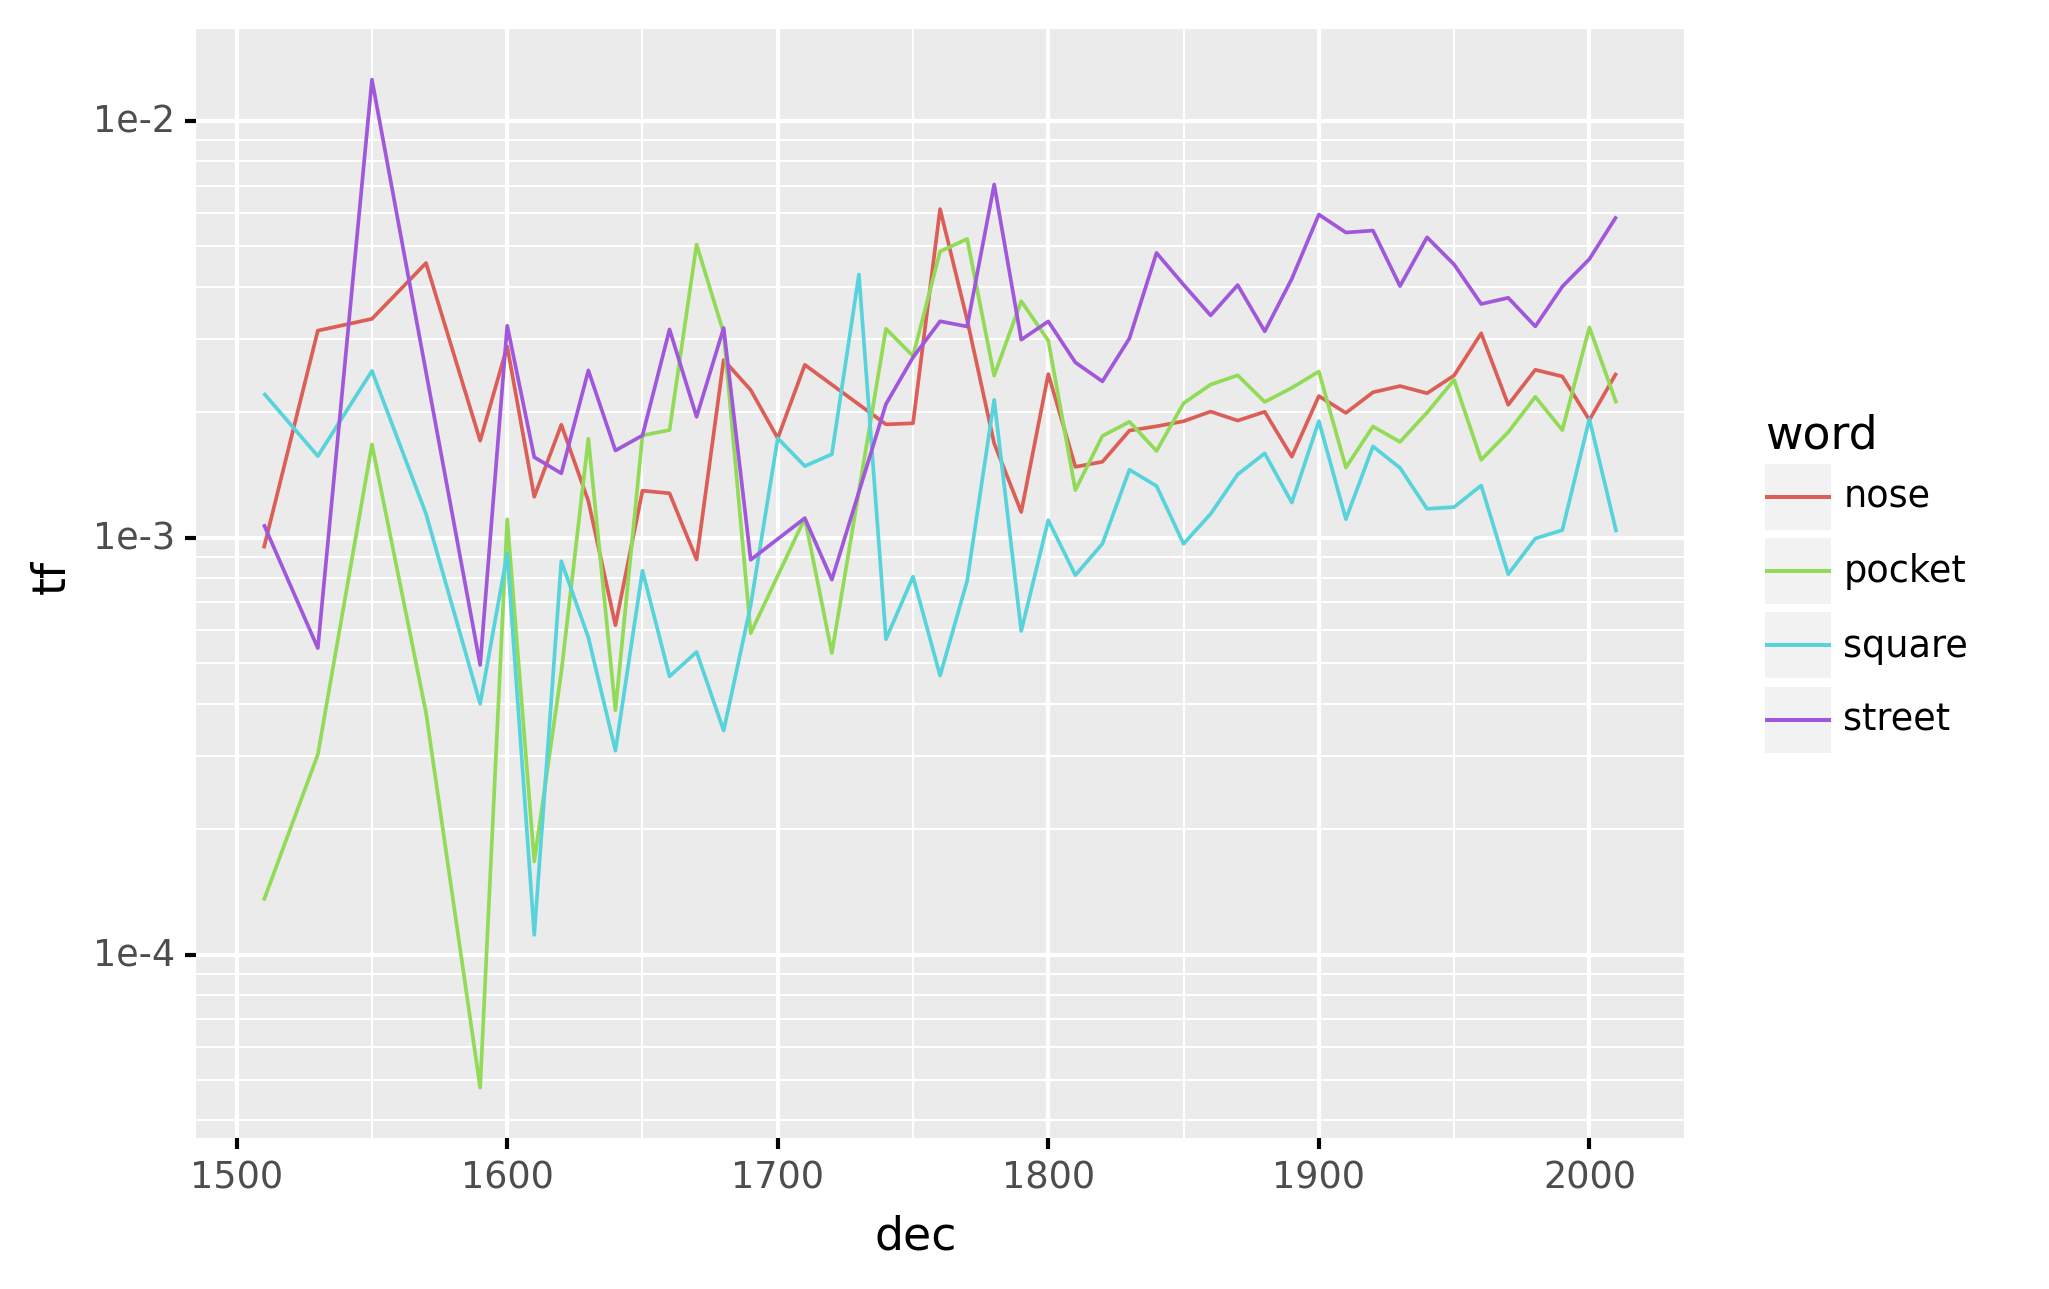

<ggplot: (8732669633305)>

In [73]:
fig=p9.ggplot(p9.aes(x='dec',y='tf',color='word'),data=figdf)
fig+=p9.geom_line()
fig+=p9.scale_y_log10()
fig

In [ ]:
e